## Import Python Libraries and Data Sets

In [1]:
!pip install autograd-1.7.0-py3-none-any.whl
!pip install autograd-gamma-0.5.0.tar.gz
!pip install interface_meta-1.3.0-py3-none-any.whl
!pip install formulaic-1.1.1-py3-none-any.whl
!pip install lifelines-0.30.0-py3-none-any.whl

Processing ./autograd-1.7.0-py3-none-any.whl
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing ./autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=48bd0fa847de29e37e28b7fa9531d08fcbd2e08fbc9fff73821169e9f3dc3e88
  Stored in directory: /Users/conorshanahan/Library/Caches/pip/wheels/db/77/30/509982d9aabdecf5fab69523039179d2bc8078da7bb547de66
Successfully built autograd-gamma
  Attempting uninstall: autograd-gamma
    Found existing installation: autograd-gamma 0.5.0
    Uninstalling autograd-gamma-0.5.0:
      Successfully uninstalled autograd-gamma-0.5.0
Processing ./interface_meta-1.3.0-py3-none-any.whl
interface-meta is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing ./formulaic-1.1.1-py

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

traindf = pd.read_csv('train.csv')
print('The size of the training data frame is:', traindf.shape)

testdf = pd.read_csv('test.csv')
print('The size of the testing data frame is:', testdf.shape)

traindf.head()

The size of the training data frame is: (28800, 60)
The size of the testing data frame is: (3, 58)


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


# EDA

## EDA On Target Variable(s)

In this case we have to main target variables, `efs` and `efs_time`. `efs` is a binary variable where a value of 1 means the patient did not survive and their`efs_time` value is associated with their time of death. A value of 0 means that no event has been reported but it is unclear if the patient survived, however, the patient survived at least as long as their reported `efs_time`.

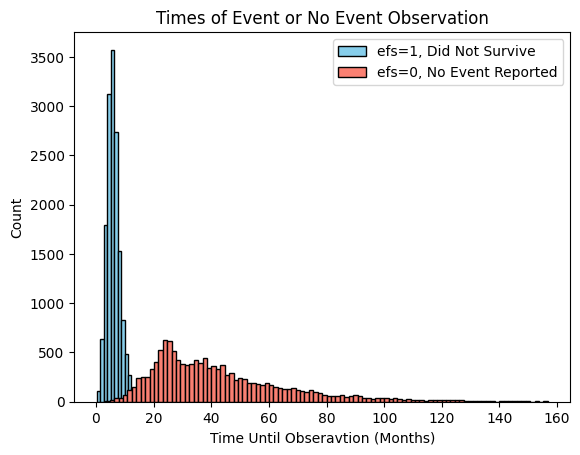

In [10]:
plt.hist(traindf.loc[traindf['efs']==1, 'efs_time'], bins=100, edgecolor='black', color='skyblue', label="efs=1, Did Not Survive")
plt.hist(traindf.loc[traindf['efs']==0, 'efs_time'], bins=100, edgecolor='black', color='salmon', label='efs=0, No Event Reported')
plt.xlabel('Time Until Obseravtion (Months)')
plt.ylabel('Count')
plt.title('Times of Event or No Event Observation')
plt.legend()
plt.show()

## Target Variable Transformation
Combine `efs` and `efs_time` to make a new target variable which is a function of both.

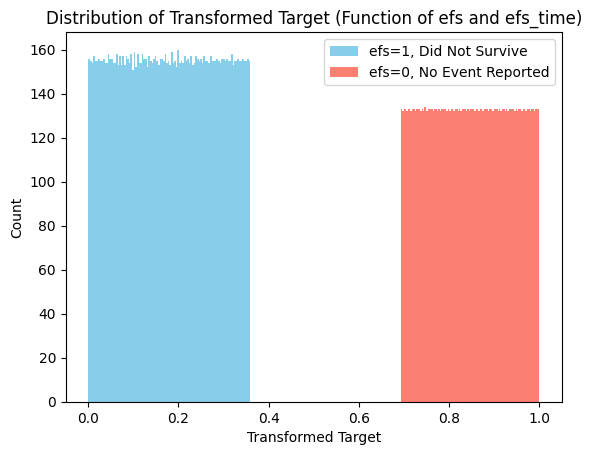

In [13]:
traindf['y'] = traindf['efs_time'].values
mx = traindf.loc[traindf['efs']==1, 'efs_time'].max()
mn = traindf.loc[traindf['efs']==0, 'efs_time'].min()
traindf.loc[traindf['efs']==0, 'y'] = traindf.loc[traindf['efs']==0, 'y'] + mx - mn
traindf['y'] = traindf['y'].rank()
traindf.loc[traindf['efs']==0, 'y'] += len(traindf)//2
traindf['y'] = traindf['y']/traindf['y'].max()

plt.hist(traindf.loc[traindf['efs']==1, 'y'], bins=100, color='skyblue', label="efs=1, Did Not Survive")
plt.hist(traindf.loc[traindf['efs']==0, 'y'], bins=100, color='salmon', label='efs=0, No Event Reported')
plt.xlabel('Transformed Target')
plt.ylabel('Count')
plt.title('Distribution of Transformed Target (Function of efs and efs_time)')
plt.legend()
plt.show()

## EDA on Features
First remove traget variables and other irrelevant variables to isolate the features that will be used with the model. Next, split the isolated features into categorical and numeric. Then, explore the different numerical features with histograms and box plots.

In [16]:
RMV = ['ID', 'efs', 'efs_time', 'y']
features = [c for c in traindf.columns if c not in RMV]
print(f'There are {len(features)} features. They are the following: \n{features}')

There are 57 features. They are the following: 
['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [18]:
CATVARS = []
for c in features:
    if traindf[c].dtype == 'object':
        CATVARS.append(c)
        traindf[c] = traindf[c].fillna('NAN')
        testdf[c] = testdf[c].fillna('NAN')
print(f'There are {len(CATVARS)} categorical variables. They are the following: \n{CATVARS}')

There are 35 categorical variables. They are the following: 
['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


In [20]:
NUMVARS = [c for c in features if c not in CATVARS]
print(f'There are {len(NUMVARS)} numeric variables. They are the following: \n{NUMVARS}')

There are 22 numeric variables. They are the following: 
['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age', 'hla_match_b_low', 'age_at_hct', 'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score', 'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high', 'hla_low_res_10']


In [22]:
import seaborn as sns

plots_per_row = 2

num_vars = len(NUMVARS)
num_rows = int(np.ceil(num_vars/plots_per_row))

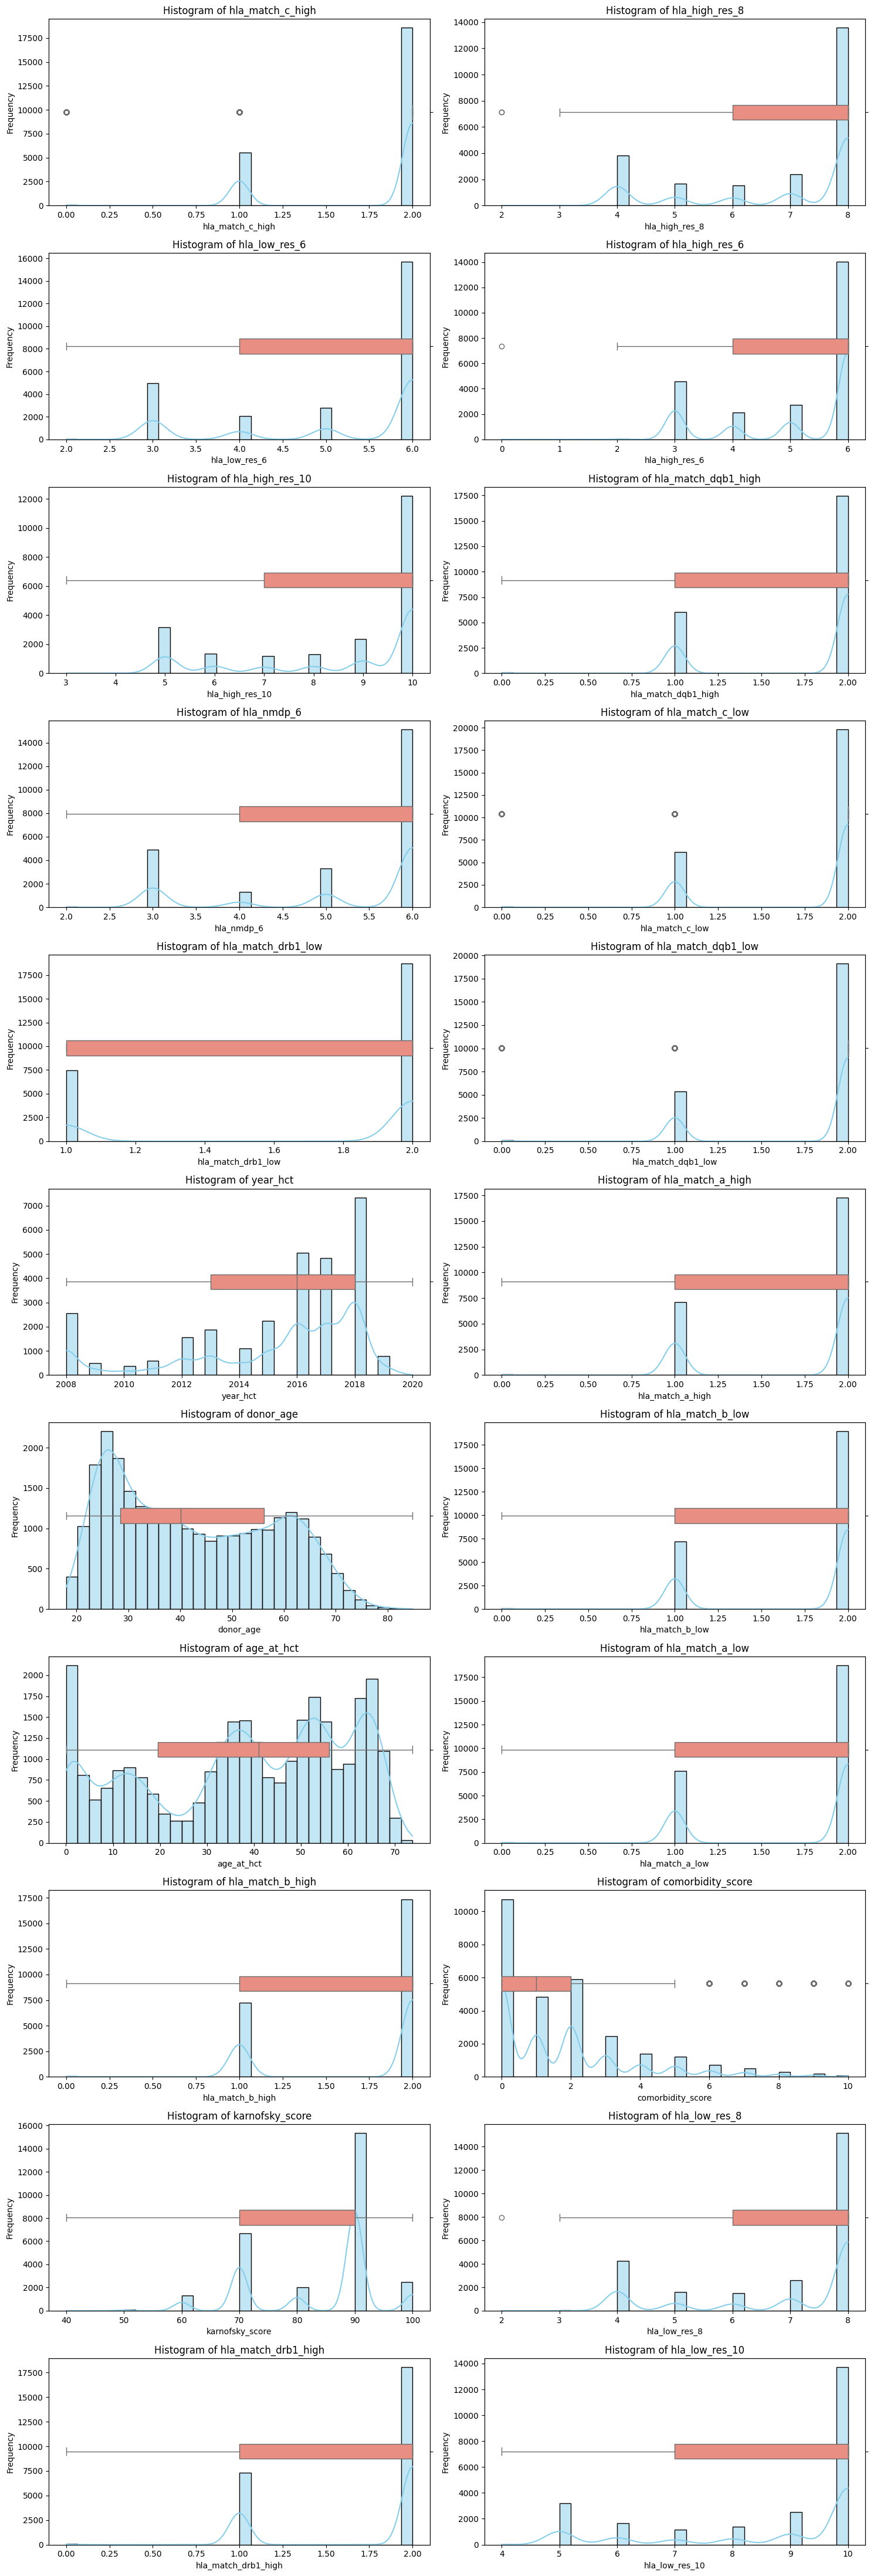

In [23]:
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15,4*num_rows))

if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)

axes = axes.ravel()

for i, column in enumerate(NUMVARS):
    sns.histplot(traindf[column], ax=axes[i], bins=30, kde=True, color='skyblue')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_ylabel('Frequency')

    ax_twin=axes[i].twinx()
    sns.boxplot(x=traindf[column], ax=ax_twin, color='salmon')
    ax_twin.set(ylim=(-5,5))

plt.tight_layout()
plt.show()

**From the above plots, we can see that majority of the numeric variables have a limited number of potential values.**

## Label Encode Categorical Features

In [28]:
combineddf = pd.concat([traindf, testdf], axis=0, ignore_index=False)

for c in features:
    if c in CATVARS:
        print(f"{c}, ",end="")
        combineddf[c],_ = combineddf[c].factorize()
        combineddf[c] -= combineddf[c].min()
        combineddf[c] = combineddf[c].astype('int32')
        combineddf[c] = combineddf[c].astype('category')

    else:
        if combineddf[c].dtype=='float64':
            combineddf[c] = combineddf[c].astype('float32')
        if combineddf[c].dtype=='int64':
            combineddf[c] = combineddf[c].astype('int32')

traindf = combineddf.iloc[:len(traindf)].copy()
testdf = combineddf.iloc[:len(testdf)].copy()

dri_score, psych_disturb, cyto_score, diabetes, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, tce_imm_match, rituximab, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe, prior_tumor, peptic_ulcer, gvhd_proph, rheum_issue, sex_match, race_group, hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac, pulm_moderate, 

In [30]:
traindf.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,y
0,0,0,0,0,0,NaN,NaN,0,0,6.0,0,0,0,0,0,6.0,0,NaN,2.0,0,6.0,2.0,0,2.0,2.0,0,0,0,0,2016,0,0,0,0,2.0,0,NaN,0,2.0,0,9.942000,2.0,0,0,0,2.0,0,0.0,90.0,0,0,0,0,8.0,0,2.0,0,10.0,0.0,42.356,0.875370
1,1,1,0,1,0,2.0,8.0,1,0,6.0,1,0,0,0,1,6.0,0,10.0,2.0,1,6.0,2.0,0,2.0,2.0,1,1,1,0,2008,0,1,1,1,2.0,0,72.290001,0,2.0,0,43.705002,2.0,1,0,1,2.0,1,3.0,90.0,0,1,1,0,8.0,0,2.0,1,10.0,1.0,4.672,0.101458
2,2,0,0,0,0,2.0,8.0,0,0,6.0,0,0,0,0,2,6.0,0,10.0,2.0,1,6.0,2.0,0,2.0,2.0,0,0,0,0,2019,0,0,0,0,2.0,0,NaN,0,2.0,0,33.997002,2.0,2,0,2,2.0,0,0.0,90.0,0,1,1,0,8.0,0,2.0,0,10.0,0.0,19.793,0.726134
3,3,2,0,1,0,2.0,8.0,0,0,6.0,0,0,0,0,3,6.0,0,10.0,2.0,1,6.0,2.0,0,2.0,2.0,0,1,1,0,2009,0,1,1,1,2.0,0,29.230000,0,2.0,0,43.244999,2.0,3,0,3,2.0,2,0.0,90.0,1,1,0,0,8.0,0,2.0,0,10.0,0.0,102.349,0.990463
4,4,2,0,0,0,2.0,8.0,0,0,6.0,1,0,0,0,4,6.0,0,10.0,2.0,0,5.0,2.0,0,2.0,2.0,1,0,1,1,2018,0,0,0,0,2.0,0,56.810001,0,2.0,0,29.740000,2.0,4,0,0,2.0,3,1.0,90.0,0,1,1,1,8.0,0,2.0,0,10.0,0.0,16.223,0.711134


In [32]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor, XGBClassifier
import xgboost

In [34]:
%%time
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_xgb=np.zeros(len(traindf))
pred_xgb = np.zeros(len(testdf))

for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
    print('#' *25)
    print(f'### Fold {i+1}')
    print('#' *25)

    x_train = traindf.loc[traindf_index, features].copy()
    y_train = traindf.loc[traindf_index, 'y']
    x_valid = traindf.loc[testdf_index, features].copy()
    y_valid = traindf.loc[testdf_index, 'y']
    x_test = testdf[features].copy()

    model_xgb = XGBRegressor(
        device='cuda',
        max_depth=3,
        colsample_bytree=0.8,
        subsample=0.8,
        n_estimators=10_000,
        learning_rate=0.1,
        eval_metric='mae',
        early_stopping_rounds=25,
        objective='reg:logistic',
        enable_categorical=True,
        min_child_weight=5
    )

    model_xgb.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        verbose=100
    )

    oof_xgb[testdf_index] = model_xgb.predict(x_valid)
    pred_xgb += model_xgb.predict(x_test)

pred_xgb /= FOLDS

#########################
### Fold 1
#########################
[0]	validation_0-mae:0.32903
[100]	validation_0-mae:0.27749
[200]	validation_0-mae:0.27288
[300]	validation_0-mae:0.27083
[400]	validation_0-mae:0.26957
[500]	validation_0-mae:0.26861
[543]	validation_0-mae:0.26827
#########################
### Fold 2
#########################
[0]	validation_0-mae:0.32706
[100]	validation_0-mae:0.27610
[200]	validation_0-mae:0.27141
[300]	validation_0-mae:0.26929
[400]	validation_0-mae:0.26832
[500]	validation_0-mae:0.26803
[547]	validation_0-mae:0.26778
#########################
### Fold 3
#########################
[0]	validation_0-mae:0.32696
[100]	validation_0-mae:0.27521
[200]	validation_0-mae:0.27078
[300]	validation_0-mae:0.26840
[400]	validation_0-mae:0.26701
[477]	validation_0-mae:0.26629
#########################
### Fold 4
#########################
[0]	validation_0-mae:0.33010
[100]	validation_0-mae:0.28046
[200]	validation_0-mae:0.27626
[300]	validation_0-mae:0.27401
[400]	valida

In [44]:
import import_ipynb
from metric import score

In [46]:
y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = -oof_xgb
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for XGBoost = {m}')

Overall CV for XGBoost = 0.6666441513042486


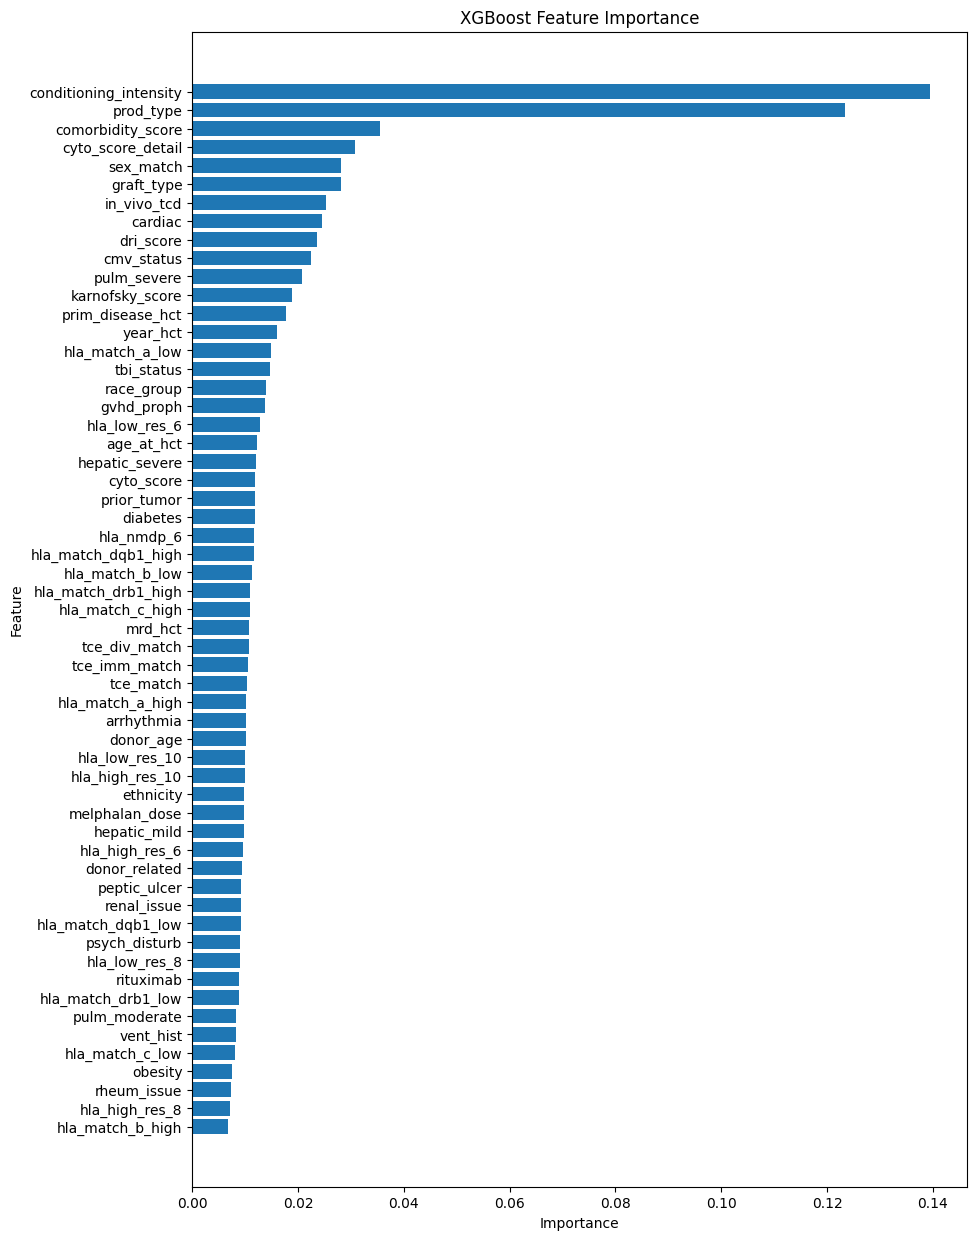

In [48]:
feature_importance = model_xgb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [42]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [60]:
%%time
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_cat=np.zeros(len(traindf))
pred_cat = np.zeros(len(testdf))

for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
    print('#' *25)
    print(f'### Fold {i+1}')
    print('#' *25)

    x_train = traindf.loc[traindf_index, features].copy()
    y_train = traindf.loc[traindf_index, 'y']
    x_valid = traindf.loc[testdf_index, features].copy()
    y_valid = traindf.loc[testdf_index, 'y']
    x_test = testdf[features].copy()

    model_cat = CatBoostRegressor(
        iterations = 1000,
        depth=6,
        learning_rate=0.05,
        loss_function='RMSE',
        early_stopping_rounds=100,
        random_seed=42,
        verbose=100
    )

    model_cat.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        cat_features = CATVARS,
        verbose=100
    )

    oof_cat[testdf_index] = model_cat.predict(x_valid)
    pred_cat += model_cat.predict(x_test)

pred_cat /= FOLDS

#########################
### Fold 1
#########################
0:	learn: 0.3442610	test: 0.3451349	best: 0.3451349 (0)	total: 150ms	remaining: 2m 29s
100:	learn: 0.3136157	test: 0.3166924	best: 0.3166924 (100)	total: 5.71s	remaining: 50.8s
200:	learn: 0.3083744	test: 0.3139406	best: 0.3139406 (200)	total: 11.2s	remaining: 44.5s
300:	learn: 0.3036824	test: 0.3123467	best: 0.3123467 (300)	total: 17.8s	remaining: 41.4s
400:	learn: 0.3005179	test: 0.3116249	best: 0.3116249 (400)	total: 24.4s	remaining: 36.5s
500:	learn: 0.2978248	test: 0.3111949	best: 0.3111949 (500)	total: 30.7s	remaining: 30.6s
600:	learn: 0.2953281	test: 0.3108877	best: 0.3108877 (600)	total: 37s	remaining: 24.5s
700:	learn: 0.2933030	test: 0.3105905	best: 0.3105875 (694)	total: 43.9s	remaining: 18.7s
800:	learn: 0.2917388	test: 0.3104966	best: 0.3104778 (771)	total: 50.1s	remaining: 12.4s
900:	learn: 0.2900859	test: 0.3104387	best: 0.3104306 (898)	total: 56.6s	remaining: 6.22s
999:	learn: 0.2884011	test: 0.3102406	best

In [62]:
y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = -oof_cat
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for CatBoost = {m}')

Overall CV for CatBoost = 0.6657432744085358


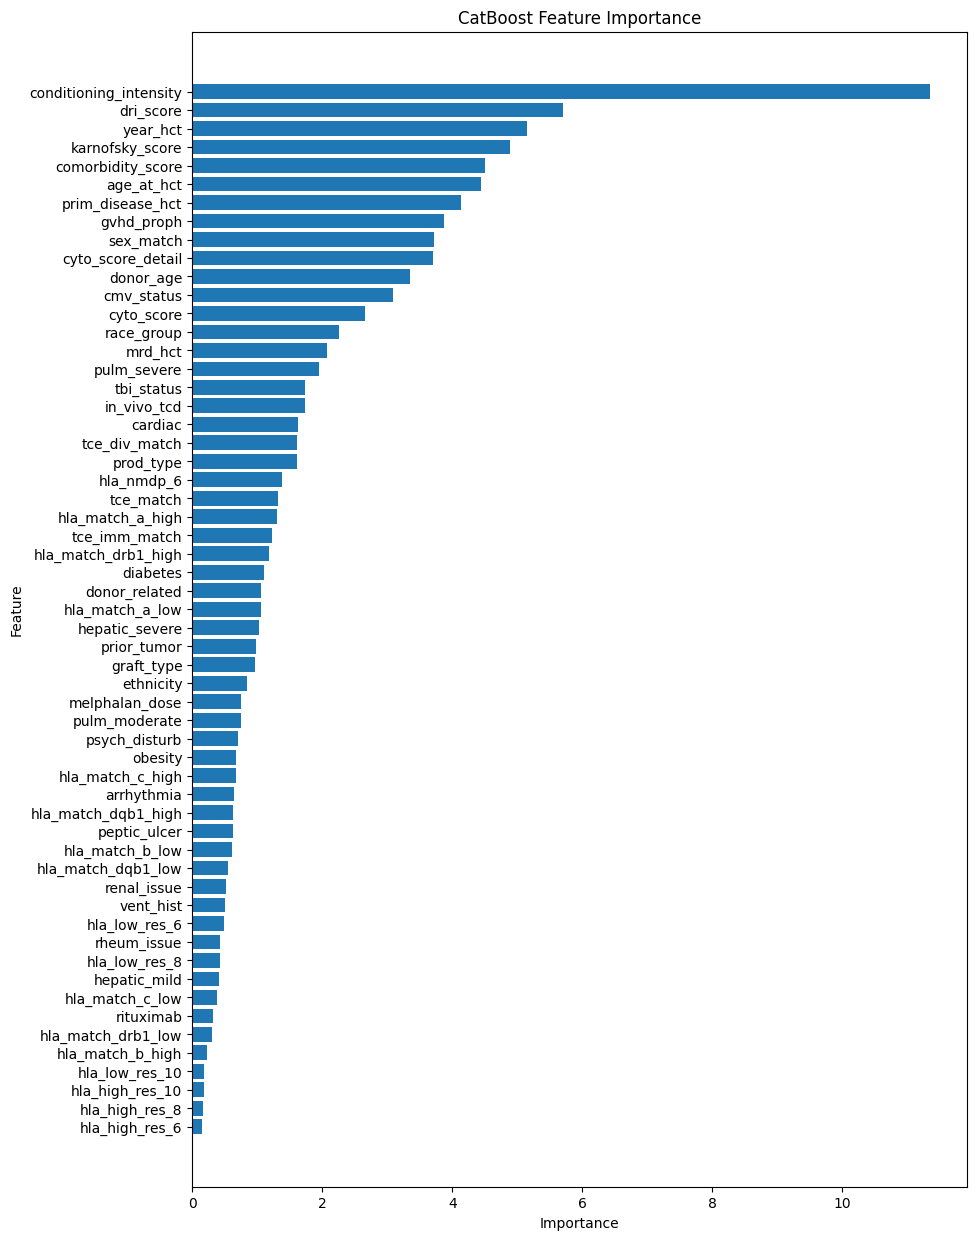

In [64]:
feature_importance = model_cat.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [66]:
y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = -oof_xgb -oof_cat
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for Ensemble = {m}')

Overall CV for Ensemble = 0.6679999714548802


In [70]:
sub = pd.read_csv("sample_submission.csv")
sub.prediction = -pred_xgb -pred_cat
sub.to_csv("submission.csv",index=False)
print("Sub shape:",sub.shape)
sub.head()

Sub shape: (3, 2)


,ID,prediction
0,28800,-1.508168
1,28801,-0.828393
2,28802,-1.501586
